MuSe Music Sentiment Analysis 
Here we will analyze music/artists based on the way that their songs are tagged for valence, arousal, and dominance. 

In [27]:
import pandas as pd 
import numpy as np 
df = pd.read_csv('muse_dataset.csv')
df.head()

,id,track,artist,valence_tags,arousal_tags,dominance_tags,mbid,spotify_id
0,0,'Till I Collapse,Eminem,4.550000,5.273125,5.690625,cab93def-26c5-4fb0-bedd-26ec4c1619e1,4xkOaSrkexMciUUogZKVTS
1,1,St. Anger,Metallica,3.710000,5.833000,5.427250,727a2529-7ee8-4860-aef6-7959884895cb,3fOc9x06lKJBhz435mInlH
2,2,Speedin',Rick Ross,3.080000,5.870000,5.490000,NaN,3Y96xd4Ce0J47dcalLrEC8
3,3,Bamboo Banga,M.I.A.,6.555071,5.537214,5.691357,99dd2c8c-e7c1-413e-8ea4-4497a00ffa18,6tqFC1DIOphJkCwrjVzPmg
4,4,Die MF Die,Dope,3.771176,5.348235,5.441765,b9eb3484-5e0e-4690-ab5a-ca91937032a5,5bU4KX47KqtDKKaLM4QCzh


I collected data on many different songs using sources from Last.fm, Spotify, and MusicBrainz ID. I refined the data by removing excess information when there were more categories to be reading 

In [28]:
df = df.drop(['id','mbid', 'spotify_id'], axis = 1)
df.head(10)

,track,artist,valence_tags,arousal_tags,dominance_tags
0,'Till I Collapse,Eminem,4.550000,5.273125,5.690625
1,St. Anger,Metallica,3.710000,5.833000,5.427250
2,Speedin',Rick Ross,3.080000,5.870000,5.490000
3,Bamboo Banga,M.I.A.,6.555071,5.537214,5.691357
4,Die MF Die,Dope,3.771176,5.348235,5.441765
5,Step Up,Drowning Pool,2.971389,5.537500,4.726389
6,Feedback,Kanye West,3.080000,5.870000,5.490000
7,7 Words,Deftones,3.807121,5.473939,4.729091
8,Limp,Fiona Apple,3.737211,5.610204,4.626735
9,Sweet Amber,Metallica,3.582759,5.757241,5.340000


I am interested in searching the data frame in order to find out the type of music that artists make when ranked in terms of valence, arousal, and dominance. 


In [29]:
df_sorted = df.sort_values(by=['valence_tags', 'arousal_tags', 'dominance_tags'], ascending=[False, False, False])
df_sorted

,track,artist,valence_tags,arousal_tags,dominance_tags
40536,I'm Good,The Mowgli's,8.475000,6.275000,7.130000
40050,Electric Love,BØRNS,8.470000,6.050000,7.210000
40078,Time of Our Lives,Pitbull,8.470000,6.050000,7.210000
40127,Hold My Hand,Jess Glynne,8.470000,6.050000,7.210000
40135,I Wanna Get Better,Bleachers,8.470000,6.050000,7.210000
...,...,...,...,...,...
12228,Nightmare on My Street,DJ Jazzy Jeff & The Fresh Prince,0.307273,0.557273,0.317273
1739,Remember (live),Disturbed,0.291062,0.713274,0.472832
11928,Attack of the Ghost Riders,The Raveonettes,0.287850,0.392523,0.293084
11972,Great Pumpkin Waltz,Vince Guaraldi Trio,0.250370,0.454074,0.258519


I want to store the type of music for each artist.

In [30]:
music_types = {}

I would like to loop through the data and store the types of music for each artist. 

In [31]:
for index, row in df_sorted.iterrows():
    if row['artist'] not in music_types:
        if row['valence_tags'] >= 0.5 and row['arousal_tags'] >= 50 and row['dominance_tags'] >= 50:
            music_types[row['artist']] = 'Type A'
        elif row['valence_tags'] >= 0.5 and row['arousal_tags'] < 50 and row['dominance_tags'] < 50:
            music_types[row['artist']] = 'Type B'
        elif row['valence_tags'] < 0.5 and row['arousal_tags'] >= 50 and row['dominance_tags'] < 50:
            music_types[row['artist']] = 'Type C'
        else:
            music_types[row['artist']] = 'Other'

I grouped each artist into the type of music that they create and prined the list. 

In [32]:
for artist, music_type in music_types.items():
    print(artist, ':', music_type)

The Mowgli's : Type B
BØRNS : Type B
Pitbull : Type B
Jess Glynne : Type B
Bleachers : Type B
Unknown Mortal Orchestra : Type B
Cage the Elephant : Type B
B.o.B : Type B
Phoenix : Type B
The Beatles : Type B
Justice : Type B
Dirty Projectors : Type B
Grouplove : Type B
Michael Bublé : Type B
Janelle Monáe : Type B
Anne-Marie : Type B
Omi : Type B
Modest Mouse : Type B
Nick Cave & The Bad Seeds : Type B
Freelance Whales : Type B
Holy Ghost! : Type B
Cold War Kids : Type B
Edward Sharpe & The Magnetic Zeros : Type B
Bombay Bicycle Club : Type B
Panic! at the Disco : Type B
Brandon Flowers : Type B
Sebastian : Type B
Jason Mraz : Type B
Mika : Type B
Noah and the Whale : Type B
Alex Clare : Type B
Broncho : Type B
Jonas Brothers : Type B
Cansei de Ser Sexy : Type B
Ra Ra Riot : Type B
Cherub : Type B
Jorge Ben : Type B
Smallpools : Type B
Crystal Fighters : Type B
Girl Talk : Type B
Meghan Trainor : Type B
Hot Hot Heat : Type B
OK Go : Type B
The Beach Boys : Type B
Smash Mouth : Type B
M

I will generate a graph based on my analysis of the various types of music sentiment. 

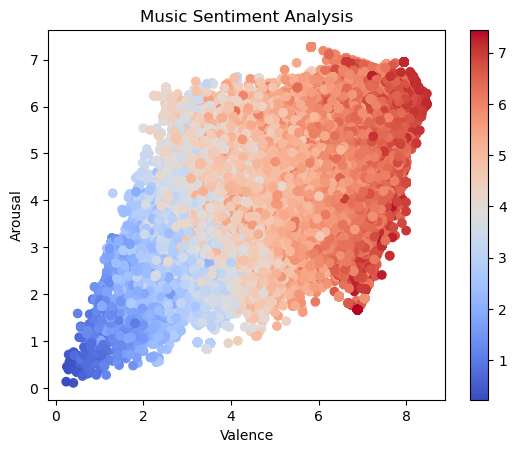

In [33]:
import matplotlib.pyplot as plt
plt.scatter(df['valence_tags'], df['arousal_tags'], c=df['dominance_tags'], cmap='coolwarm')
plt.colorbar()
plt.xlabel('Valence')
plt.ylabel('Arousal')
plt.title('Music Sentiment Analysis')
plt.show()